### Contents:

*    [1 Cats and dogs](#1.-Cats-and-dogs)
*    [2 Millionaires](#2.-Millionaires)
*    [3 Trains stations](#Trains-stations)

# 1. Cats and dogs

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv("07-hw-animals.csv")

In [8]:
df.columns

Index(['animal', 'name', 'length'], dtype='object')

In [9]:
df.head(3)

,animal,name,length
0,cat,Anne,35
1,cat,Bob,45
2,dog,Egglesburg,65


In [11]:
df.sort_values(by='length', ascending=False).head(3)

,animal,name,length
2,dog,Egglesburg,65
3,dog,Devon,50
1,cat,Bob,45


In [23]:
df['animal'].value_counts()

dog    3
cat    3
Name: animal, dtype: int64

In [25]:
dogs = df[df['animal']=='dog']
dogs

,animal,name,length
2,dog,Egglesburg,65
3,dog,Devon,50
5,dog,Fontaine,35


In [28]:
df[df['length'] > 40]

,animal,name,length
1,cat,Bob,45
2,dog,Egglesburg,65
3,dog,Devon,50


In [29]:
df['inches'] = .393701 * df['length']

In [30]:
df

,animal,name,length,inches
0,cat,Anne,35,13.779535
1,cat,Bob,45,17.716545
2,dog,Egglesburg,65,25.590565
3,dog,Devon,50,19.685050
4,cat,Charlie,32,12.598432
5,dog,Fontaine,35,13.779535


In [31]:
cats = df[df['animal']=='cat']
dogs = df[df['animal']=='dog']


In [37]:
# Display all of the animals that are cats and above 12 inches long.
# First do it using the "cats" variable, then do it using your normal dataframe.

cats[cats['inches'] > 12]
df[(df['animal'] == 'cat') & (df['inches'] > 12)]

,animal,name,length,inches
0,cat,Anne,35,13.779535
1,cat,Bob,45,17.716545
4,cat,Charlie,32,12.598432


In [47]:
cats['length'].describe()[['mean']]

mean    37.333333
Name: length, dtype: float64

In [48]:
dogs['length'].describe()[['mean']]

mean    50.0
Name: length, dtype: float64

In [58]:
animals = df.groupby( [ "animal"] )
animals['length'].mean()

animal
cat    37.333333
dog    50.000000
Name: length, dtype: float64

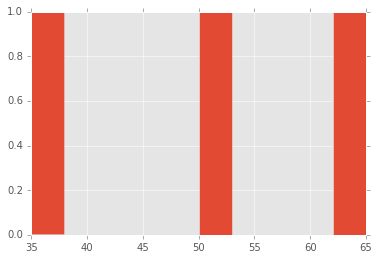

In [103]:
plt.style.use('ggplot')
dogs['length'].hist()

([<matplotlib.patches.Wedge at 0x104988b00>,
  <matplotlib.text.Text at 0x104f40b38>])

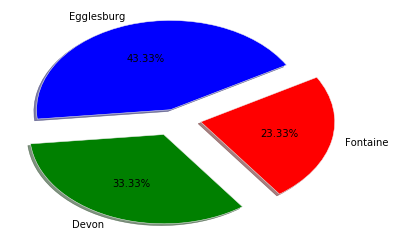

In [104]:
labels = dogs['name']
sizes = dogs['length']
explode = (0.1, 0.2, 0.2) # fun

plt.pie(sizes, explode=explode, labels=labels,
        autopct='%1.2f%%', shadow=True, startangle=30)

#cf: recent.head().plot(kind='pie', y='networthusbillion', labels=recent['name'].head(), legend=False)

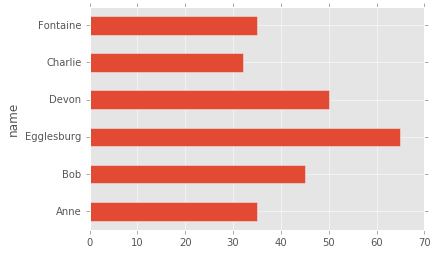

In [105]:
#Make a horizontal bar graph of the length of the animals, with their name as the label
df.plot(kind='barh', x='name', y='length', legend=False)

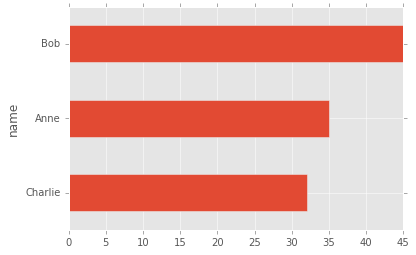

In [106]:
#Make a sorted horizontal bar graph of the cats, with the larger cats on top.
cats.sort_values(by='length').plot(kind='barh', x='name', y='length', legend=False)


# 2. Millionaires

### What country are most billionaires from? For the top ones, how many billionaires per billion people?

In [108]:
df2 = pd.read_excel("richpeople.xlsx")

In [109]:
df2.keys()

Index(['year', 'name', 'rank', 'citizenship', 'countrycode',
       'networthusbillion', 'selfmade', 'typeofwealth', 'gender', 'age',
       'industry', 'IndustryAggregates', 'region', 'north',
       'politicalconnection', 'founder', 'generationofinheritance', 'sector',
       'company', 'companytype', 'relationshiptocompany', 'foundingdate',
       'gdpcurrentus', 'sourceofwealth', 'notes', 'notes2', 'source',
       'source_2', 'source_3', 'source_4'],
      dtype='object')

In [119]:
df2['citizenship'].value_counts().head(10)

United States     903
Germany           160
China             153
Russia            119
Japan              96
Brazil             81
Hong Kong          77
France             72
United Kingdom     65
India              63
Name: citizenship, dtype: int64

In [125]:
# population: data from http://data.worldbank.org/indicator/SP.POP.TOTL
df_pop = pd.read_csv("world_pop.csv", header=2)


In [135]:
df_pop.keys()
#recent_pop = df_pop['2015']

#join: see http://pandas.pydata.org/pandas-docs/stable/merging.html#joining-on-index
left = pd.DataFrame(df2, index=['countrycode'])
right = pd.DataFrame(df_pop, index=['Country Code'])

millionaires_and_pop = left.join(right)
result = pd.merge(left, right, left_index=True, right_index=True, how='outer')


In [136]:
millionaires_and_pop
result
#millionaires_and_pop['citizenship'].value_counts().head(10)

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 60
Country Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
countrycode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### What's the average wealth of a billionaire? Male? Female?

In [145]:
print("The average wealth of a billionaire (in billions) is:", df2['networthusbillion'].describe()['mean'])

print("The average wealth of a male billionaire is:", df2[df2['gender'] == 'male']['networthusbillion'].describe()['mean'])

print("The average wealth of a female billionaire is:", df2[df2['gender'] == 'female']['networthusbillion'].describe()['mean'])



The average wealth of a billionaire (in billions) is: 3.53194338179
The average wealth of a male billionaire is: 3.5168814433
The average wealth of a female billionaire is: 3.81927710843


### Who is the poorest billionaire? Who are the top 10 poorest billionaires?

In [188]:
print('The poorest billionaire is:', df2.get_value(df2.sort_values('networthusbillion', ascending=True).index[0],'name'))

df2.sort_values('networthusbillion', ascending=True).head(10)

The poorest billionaire is: T.S. Kalyanaraman


,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
2316,2014,T.S. Kalyanaraman,1565,India,IND,1.0,self-made,founder non-finance,male,66.0,...,founder,1993.0,NaN,jewelry,NaN,NaN,http://en.wikipedia.org/wiki/T.S._Kalyanaraman,http://www.bloomberg.com/news/articles/2013-01...,NaN,NaN
1202,2001,John Todd,490,New Zealand,NZL,1.0,inherited,inherited,male,NaN,...,relation,1929.0,5.387259e+10,NaN,3rd generation,NaN,http://en.wikipedia.org/wiki/Todd_Corporation#...,http://en.wikipedia.org/wiki/Bryan_Todd_(New_Z...,Inside the Todd empire The New Zealand Herald ...,NaN
482,2014,Dariusz Milek,1565,Poland,POL,1.0,self-made,self-made finance,male,46.0,...,founder,1989.0,NaN,"real estate, retail",NaN,NaN,http://pl.wikipedia.org/wiki/Dariusz_Mi%C5%82ek,http://www.forbes.com/profile/dariusz-milek/,NaN,NaN
1204,2014,John Van Lieshout,1565,Australia,AUS,1.0,self-made,self-made finance,male,68.0,...,founder,NaN,NaN,real estate,NaN,NaN,http://www.forbes.com/profile/john-van-lieshout/,"The Courier Mail (Australia) July 25, 2015 Sat...",NaN,NaN
2174,2014,Serhiy Tihipko,1565,Ukraine,UKR,1.0,self-made,self-made finance,male,54.0,...,founder,1992.0,NaN,"banking, agriculture",NaN,NaN,http://www.forbes.com/profile/serhiy-tihipko/,http://en.wikipedia.org/wiki/PrivatBank,http://www.kyivpost.com/content/business/priva...,NaN
2547,2014,Wu Chung-Yi,1565,Taiwan,Taiwan,1.0,self-made,executive,male,55.0,...,investor,1991.0,NaN,manufacturing,NaN,NaN,http://www.forbes.com/profile/wu-chung-yi/,http://en.wikipedia.org/wiki/Tingyi_(Cayman_Is...,Tingyi-Campbell sale talks stay on track South...,NaN
122,2001,Amalia Lacroze de Fortabat,490,Argentina,ARG,1.0,inherited,inherited,female,NaN,...,relation,1926.0,2.690000e+11,NaN,widow,NaN,http://en.wikipedia.org/wiki/Mar%C3%ADa_Amalia...,"Australian Financial Review February 28, 2014 ...",NaN,NaN
1019,1996,Jack Taylor,421,United States,USA,1.0,self-made,founder non-finance,male,0.0,...,founder,1957.0,8.100200e+12,NaN,NaN,NaN,http://en.wikipedia.org/wiki/Jack_C._Taylor,http://www.forbes.com/profile/jack-taylor/,FATHER AND SON WHO BUILT ENTERPRISE ACCEPT CIT...,NaN
475,1996,Daniel Ziff,419,United States,USA,1.0,inherited,inherited,male,24.0,...,relation,1927.0,8.100200e+12,NaN,3rd generation,NaN,http://en.wikipedia.org/wiki/Ziff_Davis,http://en.wikipedia.org/wiki/William_Bernard_Z...,http://www.wsj.com/articles/ziffs-shut-down-he...,NaN
2123,1996,Saleh Kamel,403,Saudi Arabia,SAU,1.0,self-made,self-made finance,male,54.0,...,founder,1969.0,1.577430e+11,NaN,NaN,NaN,http://en.wikipedia.org/wiki/Saleh_Abdullah_Kamel,ISLAMIC BANKS TURN ATTENTION TO US MARKET The ...,NaN,NaN


### What is 'relationship to company'? And what are the most common relationships?

In [222]:
#relationship_values = set
relationship_list = df2['relationshiptocompany'].tolist()
relationship_set = set(relationship_list)
relationship_set = [s.strip() for s in relationship_set if s == s] # to remove a naughty NaN and get rid of dumb whitespaces

print("The relationships are:", str.join(', ', relationship_set))

print('\nThe five most common relationships are:')

df2['relationshiptocompany'].value_counts().head(5)

The relationships are: investor, founder and chairman, Chairman/founder, chairman, former CEO, Chairman/shareholder, co-director of zinc, copper and lead, founder, chairwoman, ceo, founder and ceo, deputy chairman, former chairman and CEO, Chairman, CEO, founder/relation, chairwomen, Exectuitve Director, Chairman and Chief Executive Officer, investor, Chairman, leadership, founder and executive chairman, founder and chairwoman, vice chairman, Vice Chairman, relative, relation/vice chairman, partner, vice-chairman, director, COO, founder/chairman, owner, Vice President, founder, chairman, ceo, founder and CEO, Chief Executive, founder, co-chairman, founder/CEO, inventor, Chairman and Chief Executive Officer, owner and vice chair, chairman of the board, inherited, Vice President of Infrastructure Software, founder CEO owner, head of Microsoft's application software group, lawyer, Honorary President for Life, investor/founder, relation and chairman, president and ceo, executive chairman, 

founder     1214
relation     945
owner         94
chairman      76
investor      36
Name: relationshiptocompany, dtype: int64

### Most common source of wealth? Male vs. female?

In [233]:
print("The three most common sources of wealth are:\n" + str(df2['typeofwealth'].value_counts().head(3)))

print("\nFor men, they are:\n" + str(df2[df2['gender'] == 'male']['typeofwealth'].value_counts().head(3)))

print("\nFor women, they are:\n" + str(df2[df2['gender'] == 'female']['typeofwealth'].value_counts().head(3)))



The three most common sources of wealth are:
inherited              953
founder non-finance    713
self-made finance      500
Name: typeofwealth, dtype: int64

For men, they are:
inherited              724
founder non-finance    687
self-made finance      493
Name: typeofwealth, dtype: int64

For women, they are:
inherited              205
founder non-finance     25
self-made finance        7
Name: typeofwealth, dtype: int64


### Given the richest person in a country, what % of the GDP is their wealth?

In [303]:
#per_country = df2.groupby(['citizenship'])
#per_country['networthusbillion'].max()
#per_country['networthusbillion'].idxmax() # DataFrame.max(axis=None, skipna=None, level=None, numeric_only=None, **kwargs)
# per_country['gdpcurrentus']

df2['percofgdp'] = (100*1000000000*df2['networthusbillion']) / (df2['gdpcurrentus'])


#pd.Series(["{0:.2f}%".format(percofgdp)])

print("NB: most countries doesn't have their GDP in the 'gdpcurrentus' column.")

df2.loc[per_country['networthusbillion'].idxmax()][['name', 'networthusbillion', 'percofgdp']]

NB: most countries doesn't have their GDP in the 'gdpcurrentus' column.


,name,networthusbillion,percofgdp
1011,Issad Rebrab,3.2,NaN
1005,Isabel dos Santos,3.7,NaN
338,Carlos and Alejandro Bulgheroni,5.5,NaN
819,Gina Rinehart,17.7,NaN
556,Dietrich Mateschitz,9.2,NaN
24,Ahmed Ali Kanoo,1.0,16.393443
50,Albert Frere,4.9,NaN
672,Ernest Stempel,2.1,57.065217
1223,Jorge Paulo Lemann,19.7,NaN
523,David Thomson,22.6,NaN


# Trains stations


In [313]:
df_trains = pd.read_csv("stations.csv", delimiter=';')
df_trains

,didok,station_name,accessible_ticket,accessible_wc,rollstuhl_verlad,mobilift,stepless_perron,bats,autelca,automat_ktu,geopos,TUNummer,Betriebspunkttyp
0,10,Basel SBB,1.0,1.0,1.0,1.0,1.0,10 Min. Übergangszeit für Züge von und nach Fr...,0.0,19.0,"47.5474041527, 7.58955146721",1,Haltestelle
1,2213,Wohlen,1.0,1.0,1.0,1.0,1.0,NaN,0.0,2.0,"47.3484618374, 8.26978121872",1,Haltestelle_und_Bedienpunkt
2,2116,Schinznach Bad,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,"47.4517752695, 8.16692832223",1,Haltestelle
3,2211,Hendschiken,1.0,0.0,1.0,0.0,0.0,NaN,0.0,1.0,"47.3894242237, 8.20737399629",1,Haltestelle
4,2226,Knonau,0.0,0.0,0.0,1.0,1.0,NaN,0.0,1.0,"47.2202591199, 8.4667085831",1,Haltestelle
5,3105,Uetikon,0.0,0.0,1.0,1.0,1.0,NaN,0.0,1.0,"47.2590294057, 8.678774746",1,Haltestelle_und_Bedienpunkt
6,3015,Zürich Wipkingen,0.0,0.0,1.0,0.0,0.0,NaN,0.0,1.0,"47.3930313233, 8.52935905447",1,Haltestelle
7,3112,Kempraten,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,"47.2383929337, 8.81429184846",1,Haltestelle
8,3100,Zollikon,0.0,0.0,0.0,0.0,1.0,NaN,0.0,1.0,"47.3373317337, 8.569717612",1,Haltestelle
9,3502,Siggenthal-Würenlingen,0.0,0.0,0.0,0.0,0.0,Postauto fahren ab Bahnhofplatz,0.0,1.0,"47.5179218559, 8.24015363326",1,Haltestelle_und_Bedienpunkt
